In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
data=pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [7]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
data.isna().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [10]:
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [11]:
data['Neighbourhood']=label_encoder.fit_transform(data['Neighbourhood'])

In [12]:
data['No-show']=label_encoder.fit_transform(data['No-show'])

In [13]:
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0


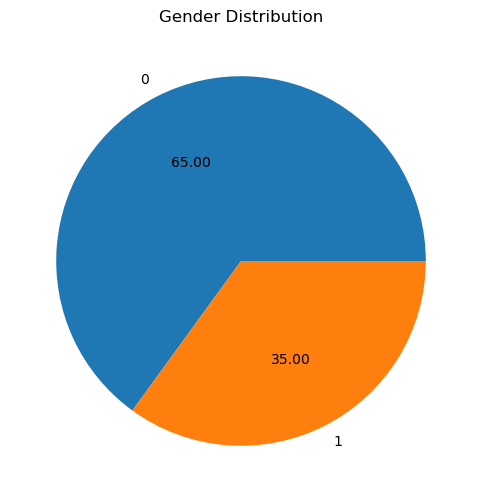

In [16]:
#gender distribution
gender_counts=data['Gender'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%.2f')
plt.title('Gender Distribution')
plt.show()

<Axes: title={'center': 'Gender distribution'}, ylabel='Frequency'>

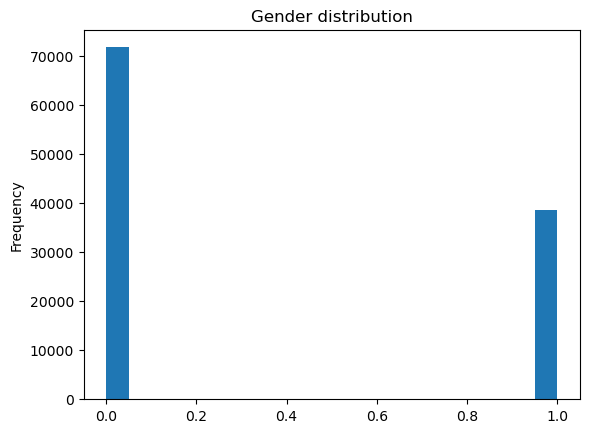

In [18]:
data['Gender'].plot(kind='hist',bins=20,title='Gender distribution')

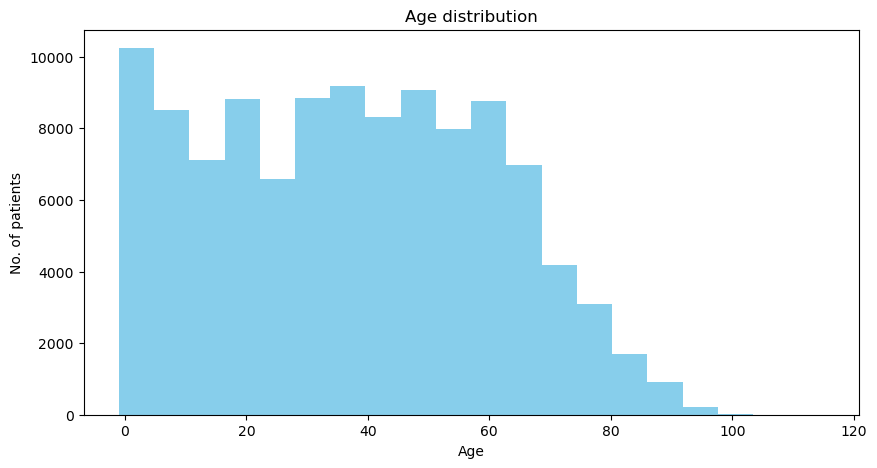

In [20]:
#Age distribution
plt.figure(figsize=(10,5))
plt.hist(data['Age'],bins=20,color='skyblue')
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('No. of patients')
plt.show()

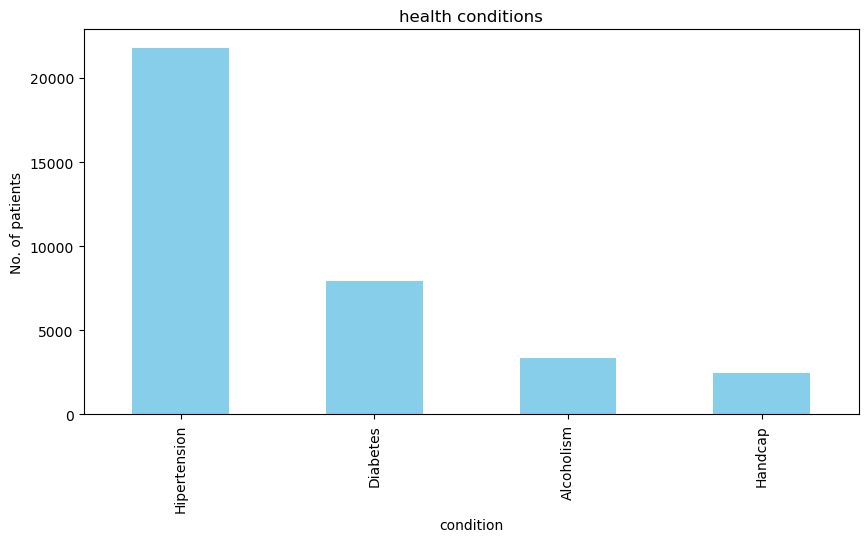

In [22]:
#Health condition
conditions=['Hipertension','Diabetes','Alcoholism','Handcap']
conditions_count=data[conditions].sum()

plt.figure(figsize=(10,5))
conditions_count.plot(kind='bar',color='skyblue')
plt.title("health conditions")
plt.xlabel("condition")
plt.ylabel("No. of patients")
plt.show()

<Figure size 1000x500 with 0 Axes>

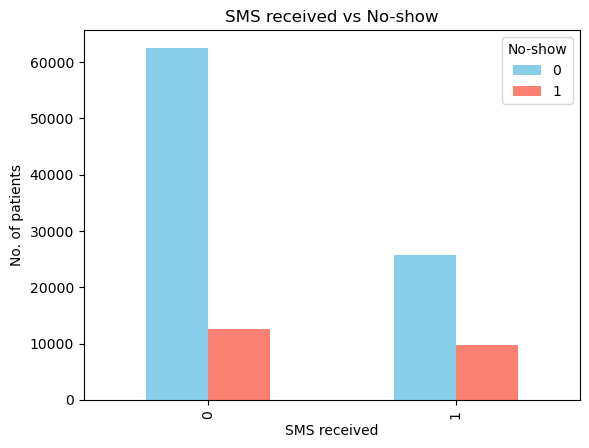

In [25]:
sms_noshow=data.groupby(['SMS_received','No-show']).size().unstack()

plt.figure(figsize=(10,5))
sms_noshow.plot(kind='bar',stacked=False,color=['skyblue','salmon'])
plt.title("SMS received vs No-show")
plt.xlabel("SMS received")
plt.ylabel("No. of patients")
plt.show()

In [27]:
x=data.drop(['No-show'],axis=1)
y=data['No-show']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.90)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_hat=model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_hat,y_test)

In [45]:
print(ac)

0.802225640097711
